# Exercises

# Create a new notebook, random_forests, and work with titanic 
# data to do the following:



In [94]:
import acquire
import prepare
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Fit the Random Forest classifier to your training sample and 
# transform (i.e. make predictions on the training sample) 
# setting the random_state accordingly and setting min_samples_leaf = 1 
# and max_depth = 10.

df = acquire.get_titanic_data()
df = prepare.prep_titanic(df)
train, validate, test = prepare.split_data(df, 'survived')
train.survived.value_counts()
train['baseline'] = 0


baseline = (train.survived == train.baseline).mean()
print('the baseline', baseline)

train = train.drop(columns='baseline')
target = 'survived'
X_train = pd.concat([train.iloc[:, 1], train.iloc[:, 3:8]], axis =1)
X_validate = pd.concat([validate.iloc[:, 1], validate.iloc[:, 3:8]], axis =1)
X_test = pd.concat([test.iloc[:, 1], test.iloc[:, 3:8]], axis =1)


y_train = train[target]
y_validate = validate[target]
y_test = test[target]

rf = RandomForestClassifier(random_state = 123, max_depth = 10, min_samples_leaf = 1)
rf.fit(X_train, y_train)

prediction_train = rf.score(X_train,y_train)
prediction_validate = rf.score(X_validate,y_validate)
prediction_test = rf.score(X_test,y_test)



y_pred = rf.predict(X_train)
y_train
y_pred

conf_matrix = confusion_matrix(y_train, y_pred)
conf_matrix

labels = sorted(y_train.unique())
labels

pd.DataFrame(conf_matrix,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

print(classification_report(y_train, y_pred))



train_prediction= rf.score(X_train, y_train)
validate_prediction= rf.score(X_validate, y_validate)
test_prediction= rf.score(X_test, y_test)
# rf.feature_importances_

print(train_prediction)
print(validate_prediction)


the baseline 0.6161048689138576
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       329
           1       0.96      0.88      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.94      0.94      0.94       534

0.9400749063670412
0.7752808988764045


In [4]:
# Evaluate your results using the model score, confusion matrix, 
# and classification report.



In [5]:
# Print and clearly label the following: Accuracy, true positive rate, 
#     false positive rate, true negative rate, false negative rate, 
#     precision, recall, f1-score, and support.



In [6]:
# Run through steps increasing your min_samples_leaf and 
# decreasing your max_depth.



In [7]:
# What are the differences in the evaluation metrics? 
# Which performs better on your in-sample data? Why?


In [70]:
# After making a few models, which one has the best performance 
# (or closest metrics) on both train and validate?


100
100


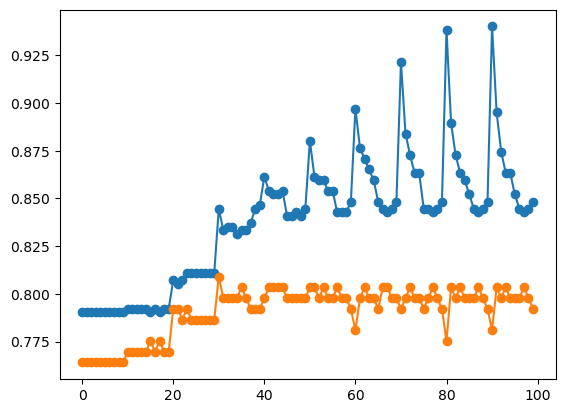

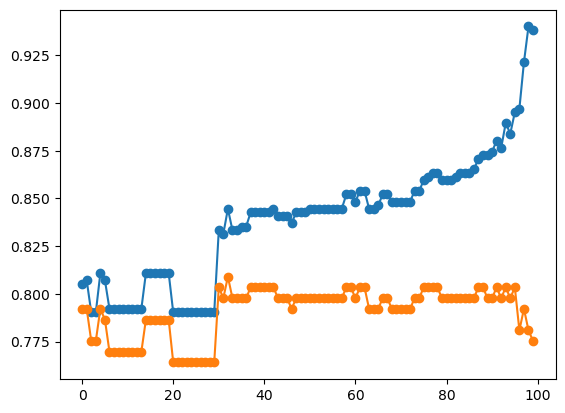

       train  validate  min_samples_leaf  max_depth  difference
0   0.805243  0.792135                 2          3    0.013109
1   0.807116  0.792135                 1          3    0.014981
2   0.790262  0.775281                 6          2    0.014981
3   0.790262  0.775281                 8          2    0.014981
4   0.810861  0.792135                 4          3    0.018727
..       ...       ...               ...        ...         ...
95  0.895131  0.803371                 2         10    0.091760
96  0.897004  0.780899                 1          7    0.116105
97  0.921348  0.792135                 1          8    0.129213
98  0.940075  0.780899                 1         10    0.159176
99  0.938202  0.775281                 1          9    0.162921

[100 rows x 5 columns]


In [120]:
def create_probability(depth, leaf):

    df = acquire.get_titanic_data()
    df = prepare.prep_titanic(df)
    train, validate, test = prepare.split_data(df, 'survived')


    target = 'survived'
    X_train = pd.concat([train.iloc[:, 1], train.iloc[:, 3:8]], axis =1)
    X_validate = pd.concat([validate.iloc[:, 1], validate.iloc[:, 3:8]], axis =1)
    X_test = pd.concat([test.iloc[:, 1], test.iloc[:, 3:8]], axis =1)

    y_train = train[target]
    y_validate = validate[target]
    y_test = test[target]

    rf = RandomForestClassifier(random_state = 124, max_depth = depth, min_samples_leaf = leaf)
    rf.fit(X_train, y_train)

    prediction_train = rf.score(X_train,y_train)
    prediction_validate = rf.score(X_validate,y_validate)
    prediction_test = rf.score(X_test,y_test)
    return prediction_train, prediction_validate
    
    
#for j in range(10, 0, -1):    
    #for i in range(10, 0, -1):
train_list = []
validate_list = []
leaf_list = []
max_depth_list = []
import itertools
for i,j in itertools.product(range(1,11),range(1,11)):
#         print('Max_depth changed to', i, 'with leaf being ', j)
    
    prediction_train, prediction_validate = create_probability(depth = i, leaf = j)
    train_list.append(prediction_train)
    validate_list.append(prediction_validate)
    leaf_list.append(j)
    max_depth_list.append(i)
        
print(len(train_list))   
print(len(validate_list))  

plt.plot(range(0, len(train_list)), train_list, marker='o')
plt.plot(range(0, len(validate_list)), validate_list, marker='o')
plt.show()

the_data = pd.DataFrame({
    'train':train_list,
    'validate':validate_list,
    'min_samples_leaf':leaf_list,
    'max_depth':max_depth_list
             })

the_data['difference'] = the_data['train'] - the_data['validate']

the_data = the_data.sort_values(by=['difference','train'], ascending= [True, True])
the_data =the_data.reset_index()
the_data = the_data.drop(columns = 'index')
plt.plot(the_data.index, the_data.train, marker='o')
plt.plot(the_data.index, the_data.validate, marker='o')
plt.show()

print(the_data)